In [1]:
!pip install vaderSentiment

In [2]:
#import the library
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import nltk
nltk.download('punkt')
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\conor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
#calculate the negative, positive, neutral and compound scores, plus verbal evaluation
def sentiment_vader(sentence):

    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()

    sentiment_dict = sid_obj.polarity_scores(sentence)
    negative = sentiment_dict['neg']
    neutral = sentiment_dict['neu']
    positive = sentiment_dict['pos']
    compound = sentiment_dict['compound']

    if sentiment_dict['compound'] >= 0.05 :
        overall_sentiment = "Positive"

    elif sentiment_dict['compound'] <= - 0.05 :
        overall_sentiment = "Negative"

    else :
        overall_sentiment = "Neutral"
  
    return negative, neutral, positive, compound, overall_sentiment

In [4]:
stories = pd.read_csv('fairytales.csv', delimiter=',')

In [5]:
stories

,Title,Text
0,HANSEL AND GRETEL,Hard by a great forest dwelt a poor wood-cutte...
1,RAPUNZEL,There were once a man and a woman who had long...
2,THE GOOSE-GIRL,"The king of a great land died, and left his qu..."
3,LITTLE RED-CAP,Once upon a time there was a dear little girl ...
4,THE FROG-PRINCE,One fine evening a young princess put on her b...
...,...,...
57,THE STORY OF THE YOUTH WHO WENT FORTH TO LEARN...,"A certain father had two sons, the elder of wh..."
58,KING GRISLY-BEARD,A great king of a land far away in the East ha...
59,IRON HANS,There was once upon a time a king who had a gr...
60,CAT-SKIN,"There was once a king, whose queen had hair of..."


In [6]:
#Hansel and Gretel
hg = stories['Text'][0]

#Little Red-Cap
lrc = stories['Text'][3]

In [25]:
def get_char_sentiment(text, char_1, char_2):

    tokens = nltk.sent_tokenize(text)
    shared_sentences = []
    sentiment = []
    total_sentiment = 0.0
    
    for t in tokens:
        if (char_1 in t) & (char_2 in t):
            shared_sentences.append(t)
            curr_sentiment = sentiment_vader(t)[3]
            total_sentiment += curr_sentiment
            sentiment.append(curr_sentiment)

    overall_sentiment = ''
    average_sentiment = total_sentiment / len(shared_sentences)
    
    if average_sentiment >= 0.05 :
        overall_sentiment = "Positive"

    elif average_sentiment <= - 0.05 :
        overall_sentiment = "Negative"

    else:
        overall_sentiment = "Neutral"
    
    print(f'Relationship: {char_1} & {char_2}')
    print(f'Sentiment: {overall_sentiment}')
    print(f'Sentiment Score: {average_sentiment}')
    
    x = list(range(1, len(shared_sentences)+1))
    sent_df = pd.DataFrame(columns=['Sentence', 'Sentiment'])
    sent_df['Sentence'] = x
    sent_df['Sentiment'] = sentiment
    
    
    sns.lineplot(data = sent_df, x = 'Sentence', y = 'Sentiment').set(title=f'Relationship: {char_1} & {char_2}')

Relationship: Hansel & Gretel
Sentiment: Positive
Sentiment Score: 0.133415


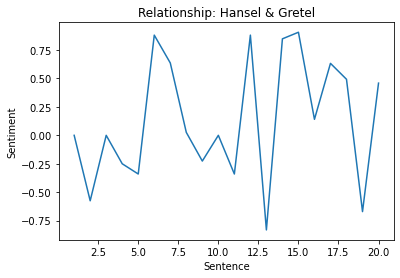

In [26]:
get_char_sentiment(hg, 'Hansel', 'Gretel')

Relationship: Little Red-Cap & wolf
Sentiment: Negative
Sentiment Score: -0.066025


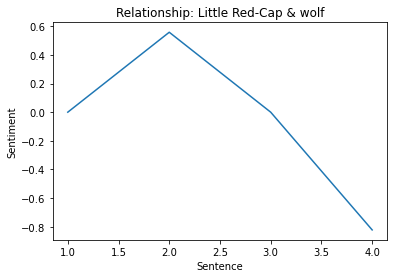

In [27]:
get_char_sentiment(lrc, 'Little Red-Cap', 'wolf')